In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.integrate import quad
from scipy.stats import norm
import statistics
import matplotlib.pyplot as plt

In [25]:
breakup = pd.read_csv('Data/Prob_of_breakup_within_1_month.csv', delimiter=',', header=None)
breakup.head(10)

,0
0,broke up
1,broke up
2,broke up
3,broke up
4,broke up
5,broke up
6,together
7,broke up
8,broke up
9,broke up


In [26]:
broke_up = 0
together = 0

for i in range(len(breakup)):
    if breakup.iloc[i,0] == 'broke up':
        broke_up += 1
    elif breakup.iloc[i,0] == 'together':
        together += 1

print(broke_up)
print(together)

2331
1669


In [27]:
print(together/(broke_up + together))

0.41725


In [33]:
X = LabelEncoder().fit_transform(breakup[0])
np.sum(X) / len(X)

0.41725

In [31]:
def integrand(x):
    return 2*np.exp(-2*x)

(result, error) = quad(integrand, 2, np.inf)
print(result)

0.018315638888710205


In [32]:
result * 1000000000

18315638.888710205

In [35]:
norm.cdf(4.2, 4.1, 0.3)

0.6305586598182371

In [37]:
sat = np.genfromtxt('Data/SAT.csv', delimiter=',')
lunch = np.genfromtxt('Data/lunch_wait_time.csv', delimiter=',')
age = np.genfromtxt('Data/student_age.csv', delimiter=',')

In [50]:
def hist_pdf(data, title=''):
    mean = np.mean(data)
    std = statistics.stdev(data)

    plt.hist(data, bins=50, density=True, color='skyblue', edgecolor='black')
    x = np.linspace(mean - 4 * std, mean + 4 * std, 100)
    y = 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-(x - mean)**2 / (2 * std**2))
    plt.plot(x, y, color='red', linewidth=2)
    plt.title(title)
    plt.show()

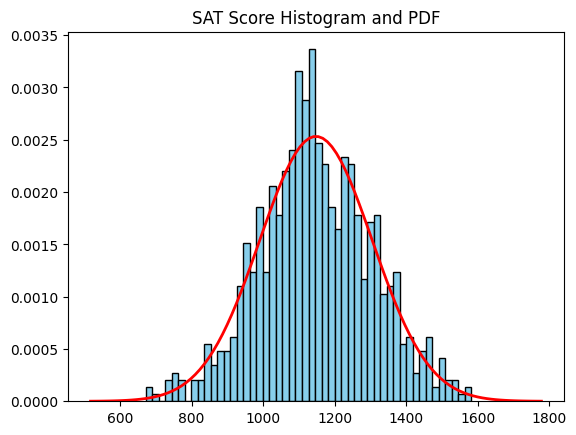

In [51]:
hist_pdf(sat, title='SAT Score Histogram and PDF')

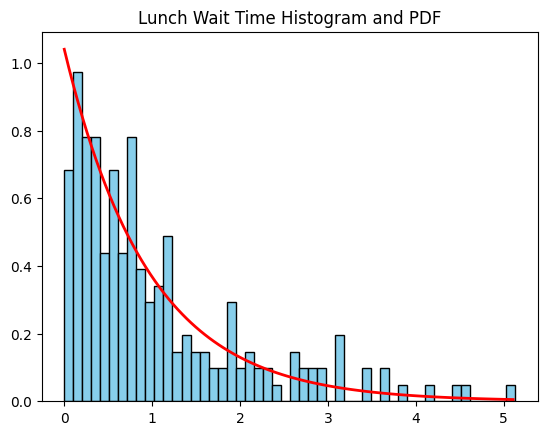

In [64]:
mean = np.mean(lunch)
std = statistics.stdev(lunch)

plt.hist(lunch, bins=50, density=True, color='skyblue', edgecolor='black')
x = np.linspace(0, mean + 4 * std, 100)
y = mean * np.exp(-(mean * x))
plt.plot(x, y, color='red', linewidth=2)
plt.title('Lunch Wait Time Histogram and PDF')
plt.show()

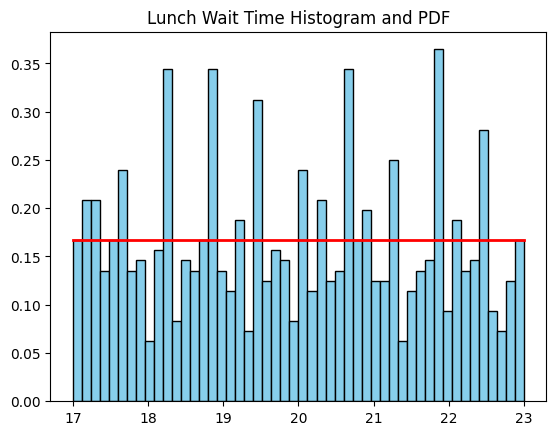

In [72]:
mean = np.mean(age)
std = statistics.stdev(age)

plt.hist(age, bins=50, density=True, color='skyblue', edgecolor='black')
x = np.linspace(min(age), max(age), 100)
y = x*0 + 1/(max(age) - min(age))
plt.plot(x, y, color='red', linewidth=2)
plt.title('Lunch Wait Time Histogram and PDF')
plt.show()

In [69]:
below_1000 = 0
for i in sat:
    if i < 1000:
        below_1000 += 1

below_1000 / len(sat)

0.1725

In [73]:
norm.cdf(1000, np.mean(sat), np.std(sat))

# they should be similar but likely not identical. My first probability is utilizing the data strictly, while normcdf models
# a cdf using the mean and standard deviation of the data to obtain the probability.

0.1738401216388557

In [74]:
norm.ppf(0.8, np.mean(sat), np.std(sat))

1280.3130769606532

In [76]:
1 - norm.cdf(3, np.mean(lunch), np.std(lunch))

0.0266600055493319

In [79]:
norm.ppf(0.9, np.mean(lunch), np.std(lunch))
# less than 90% of the population is waiting less than 2 seconds

2.3400778051880566